# This notebook compares the outputs from VESIcal to the excel spreadsheet provided by Allison
- This notebook uses the Excel spreadsheet entitled: "S1_Testing_Allison_et_al_2019.xlsx"
- Test 1 compares saturation pressures from the spreadsheet of Allison et al. (2019) for the sunset crater composition at variable CO$_2$ contents (H$_2$O=0 wt%).
- Test 2 compares saturation pressures from the spreadsheet of Allison et al. (2019) to those calculated by VESIcal for all 6 models at 100, 5000 and 8000 ppm CO$_2$ (and H$_2$O=0 wt%). Note, the SFVF composition is evaluated at 7000 ppm, as at 8000 ppm, the pressure exceeds the maximum allowed by the Allison et al. (2019) spreadsheet. 


In [2]:
import sys
sys.path.insert(0, '../../../../')

import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

In [2]:
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels
plt.rcParams["legend.fontsize"]= 14

# Test 1 - Saturation pressures for variable CO$_2$ contents (Sunset Crater, 0 wt% H$_2$O)
- this test compares saturation pressures from the spreadsheet of Allison et al. (2019) to those calculated by VESIcal for the Sunset Crater composition.

In [3]:
myfile_Test1= v.ExcelFile('S1_Testing_Allison_et_al_2019.xlsx',   input_type='wtpercent', sheet_name='SunsetCrater_VariableCarbon_0W') # This loads the unset crater composition, and pressures calculated using the Allison Spreadsheet
data_Test1 = myfile_Test1.data
satPs_wtemps_Allison_Carbon_Test1=myfile_Test1.calculate_saturation_pressure(temperature="Temp", model='AllisonCarbon_sunset')

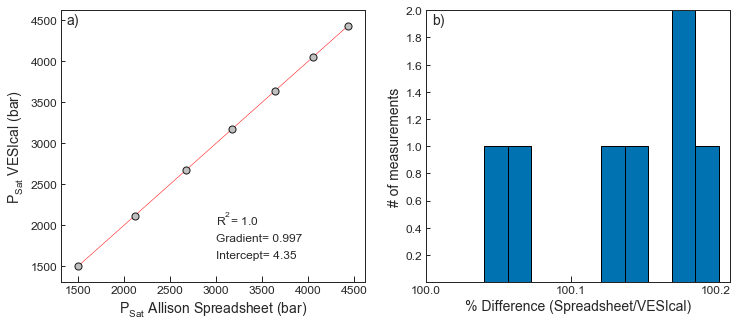

In [4]:
# Linear Regression
X_Test1=satPs_wtemps_Allison_Carbon_Test1['Press'] # Convert MPa from their supplement to bars
Y_Test1=satPs_wtemps_Allison_Carbon_Test1['SaturationP_bars_VESIcal']
mask_Test1 = (X_Test1>-1) & (Y_Test1>-1) #& (XComb<7000) # This gets rid of Nans
X_Test1noNan=X_Test1[mask_Test1].values.reshape(-1, 1)
Y_Test1noNan=Y_Test1[mask_Test1].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_Test1noNan,Y_Test1noNan)
Y_pred_Test1=lr.predict(X_Test1noNan)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5)) # adjust dimensions of figure here
ax1.set_xlabel('P$_{Sat}$ Allison Spreadsheet (bar)')
ax1.set_ylabel('P$_{Sat}$ VESIcal (bar)')
ax1.plot(X_Test1noNan,Y_pred_Test1, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
ax1.scatter(X_Test1, Y_Test1,  s=50, edgecolors='k', facecolors='silver', marker='o', zorder=5)
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 3))[2:-2]
R='R$^2$= '  +  str(np.round(r2_score(Y_Test1noNan, Y_pred_Test1), 6)) 
ax1.text(3000, 2000, R)
ax1.text(3000, 1800, G)
ax1.text(3000, 1600, I)

ax2.hist(100*X_Test1/Y_Test1)
ax2.set_xticks([100, 100.1, 100.2])
ax2.set_yticks(np.linspace(0.2, 2, 10))
ax2.set_xlabel('% Difference (Spreadsheet/VESIcal)')
ax2.set_ylabel('# of measurements')

ax2.set_ylim([0,2])
ax1.annotate("a)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
ax2.annotate("b)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
fig.savefig('Allison_Test1.png', transparent=True)


# Test 2 - Saturation pressures for variable CO$_2$ contents (0 wt% H$_2$O) for all 5 compositions
- this test compares saturation pressures from the spreadsheet of Allison et al. (2019) to those calculated by VESIcal for all 6 composition for 100, 5000 and 10,000 ppm CO$_2$ (and H$_2$O=0 wt%)

In [5]:
myfile_Test2= v.ExcelFile('S1_Testing_Allison_et_al_2019.xlsx',   input_type='wtpercent', sheet_name='Diff_Models_VariableCarbon_0W') # This loads the unset crater composition, and pressures calculated using the Allison Spreadsheet
data_Test2 = myfile_Test2.data
satPs_wtemps_Allison_Carbon_Test2=myfile_Test2.calculate_saturation_pressure(temperature="Temp", model='AllisonCarbon_sunset')

In [6]:
# This calculates the saturation pressures using each model
satPs_Allison_Carbon_Test2_Sunset=myfile_Test2.calculate_saturation_pressure(temperature="Temp", model='AllisonCarbon_sunset')
satPs_Allison_Carbon_Test2_SFVF=myfile_Test2.calculate_saturation_pressure(temperature="Temp", model='AllisonCarbon_sfvf')
satPs_Allison_Carbon_Test2_Erebus=myfile_Test2.calculate_saturation_pressure(temperature="Temp", model='AllisonCarbon_erebus')
satPs_Allison_Carbon_Test2_Vesuvius=myfile_Test2.calculate_saturation_pressure(temperature="Temp", model='AllisonCarbon_vesuvius')
satPs_Allison_Carbon_Test2_Etna=myfile_Test2.calculate_saturation_pressure(temperature="Temp", model='AllisonCarbon_etna')
satPs_Allison_Carbon_Test2_Stromboli=myfile_Test2.calculate_saturation_pressure(temperature="Temp", model='AllisonCarbon_stromboli')



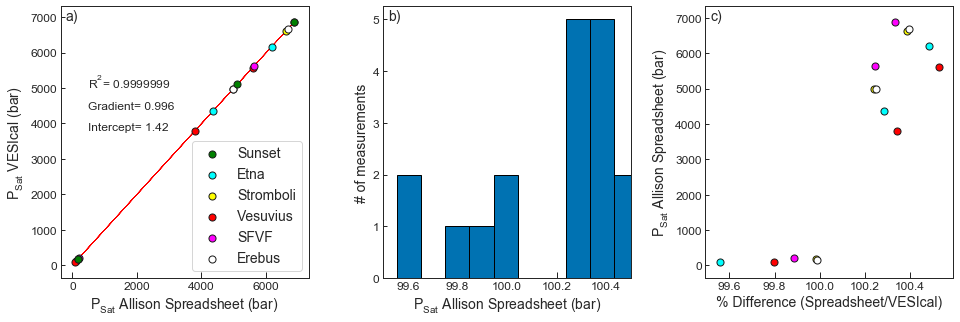

In [7]:
# Combines outputs from different models to compare to the pressures estimated in the spreadsheet of Allison et al ('Press column of input data')
a=np.concatenate((satPs_Allison_Carbon_Test2_Sunset.loc[satPs_Allison_Carbon_Test2_Sunset.Location=='SunsetCrater', ['SaturationP_bars_VESIcal']].values,
                satPs_Allison_Carbon_Test2_SFVF.loc[satPs_Allison_Carbon_Test2_SFVF.Location=='SFVF', ['SaturationP_bars_VESIcal']].values,
                satPs_Allison_Carbon_Test2_Erebus.loc[satPs_Allison_Carbon_Test2_Erebus.Location=='Erebus', ['SaturationP_bars_VESIcal']].values,
                satPs_Allison_Carbon_Test2_Vesuvius.loc[satPs_Allison_Carbon_Test2_Vesuvius.Location=='Vesuvius', ['SaturationP_bars_VESIcal']].values,
                satPs_Allison_Carbon_Test2_Etna.loc[satPs_Allison_Carbon_Test2_Etna.Location=='Etna', ['SaturationP_bars_VESIcal']].values,
                satPs_Allison_Carbon_Test2_Stromboli.loc[satPs_Allison_Carbon_Test2_Stromboli.Location=='Stromboli', ['SaturationP_bars_VESIcal']].values
                 ))
Y_syn2=a.reshape(-1, 1) 
X_syn2=satPs_Allison_Carbon_Test2_Sunset['Press'].values.reshape(-1, 1) 
lr=LinearRegression()
lr.fit(X_syn2,Y_syn2)
Y_pred_syn2=lr.predict(X_syn2)
I='Intercept= ' + str(np.round(lr.intercept_, 5))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_syn2, Y_pred_syn2), 5))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16,5)) # adjust dimensions of figure here
ax2.set_xlabel('P$_{Sat}$ Allison Spreadsheet (bar)')
ax2.set_ylabel('P$_{Sat}$ VESIcal (bar)')
ax1.plot(X_syn2,Y_pred_syn2, color='red', linewidth=0.5, zorder=1) # This plots the best fit line
# This bit plots the regression parameters on the graph
I='Intercept= ' + str(np.round(lr.intercept_, 2))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 3))[2:-2]
R='R$^2$= '  +  str(np.round(r2_score(Y_Test1noNan, Y_pred_Test1), 7)) 
ax1.text(500, 3800, I)
ax1.text(500, 4400, G)
ax1.text(500, 5000, R)

ax1.annotate("a)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
ax2.annotate("b)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
ax3.annotate("c)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)

ax1.scatter(satPs_Allison_Carbon_Test2_Sunset.loc[satPs_Allison_Carbon_Test2_Sunset.Location=='SunsetCrater', ['Press']], 
            satPs_Allison_Carbon_Test2_Sunset.loc[satPs_Allison_Carbon_Test2_Sunset.Location=='SunsetCrater', ['SaturationP_bars_VESIcal']], 
            s=50, label='Sunset', marker='o', facecolor='green', edgecolor='k', zorder=7)
ax1.scatter(satPs_Allison_Carbon_Test2_Etna.loc[satPs_Allison_Carbon_Test2_Sunset.Location=='Etna', ['Press']], 
            satPs_Allison_Carbon_Test2_Etna.loc[satPs_Allison_Carbon_Test2_Sunset.Location=='Etna', ['SaturationP_bars_VESIcal']], 
            s=50, label='Etna', marker='o', facecolor='cyan', edgecolor='k', zorder=2)
ax1.scatter(satPs_Allison_Carbon_Test2_Stromboli.loc[satPs_Allison_Carbon_Test2_Stromboli.Location=='Stromboli', ['Press']], 
            satPs_Allison_Carbon_Test2_Stromboli.loc[satPs_Allison_Carbon_Test2_Stromboli.Location=='Stromboli', ['SaturationP_bars_VESIcal']], 
            s=50, label='Stromboli', marker='o', facecolor='yellow', edgecolor='k', zorder=3)
ax1.scatter(satPs_Allison_Carbon_Test2_Vesuvius.loc[satPs_Allison_Carbon_Test2_Vesuvius.Location=='Vesuvius', ['Press']], 
            satPs_Allison_Carbon_Test2_Vesuvius.loc[satPs_Allison_Carbon_Test2_Vesuvius.Location=='Vesuvius', ['SaturationP_bars_VESIcal']], 
            s=50, label='Vesuvius', marker='o', facecolor='red', edgecolor='k', zorder=4)
ax1.scatter(satPs_Allison_Carbon_Test2_SFVF.loc[satPs_Allison_Carbon_Test2_SFVF.Location=='SFVF', ['Press']], 
            satPs_Allison_Carbon_Test2_SFVF.loc[satPs_Allison_Carbon_Test2_SFVF.Location=='SFVF', ['SaturationP_bars_VESIcal']], 
            s=50, label='SFVF', marker='o', facecolor='magenta', edgecolor='k', zorder=5)
ax1.scatter(satPs_Allison_Carbon_Test2_Erebus.loc[satPs_Allison_Carbon_Test2_Erebus.Location=='Erebus', ['Press']], 
            satPs_Allison_Carbon_Test2_Erebus.loc[satPs_Allison_Carbon_Test2_SFVF.Location=='Erebus', ['SaturationP_bars_VESIcal']], 
            s=50, label='Erebus', marker='o', facecolor='white', edgecolor='k', zorder=6)

ax2.hist(100.*X_syn2/Y_syn2)
ax3.scatter(100*(satPs_Allison_Carbon_Test2_Sunset.loc[satPs_Allison_Carbon_Test2_Sunset.Location=='Sunset', ['Press']].values)/(satPs_Allison_Carbon_Test2_Sunset.loc[satPs_Allison_Carbon_Test2_Sunset.Location=='Sunset', ['SaturationP_bars_VESIcal']].values), 
            satPs_Allison_Carbon_Test2_Sunset.loc[satPs_Allison_Carbon_Test2_Sunset.Location=='Sunset', ['Press']],
            s=50, label='Sunset', marker='o', facecolor='green', edgecolor='k', zorder=6)
ax3.scatter(100*(satPs_Allison_Carbon_Test2_Etna.loc[satPs_Allison_Carbon_Test2_Etna.Location=='Etna', ['Press']].values)/(satPs_Allison_Carbon_Test2_Etna.loc[satPs_Allison_Carbon_Test2_Etna.Location=='Etna', ['SaturationP_bars_VESIcal']].values), 
            satPs_Allison_Carbon_Test2_Etna.loc[satPs_Allison_Carbon_Test2_Etna.Location=='Etna', ['Press']],
            s=50, label='Etna', marker='o', facecolor='cyan', edgecolor='k', zorder=6)
ax3.scatter(100*(satPs_Allison_Carbon_Test2_Stromboli.loc[satPs_Allison_Carbon_Test2_Stromboli.Location=='Stromboli', ['Press']].values)/(satPs_Allison_Carbon_Test2_Stromboli.loc[satPs_Allison_Carbon_Test2_Stromboli.Location=='Stromboli', ['SaturationP_bars_VESIcal']].values), 
            satPs_Allison_Carbon_Test2_Stromboli.loc[satPs_Allison_Carbon_Test2_Stromboli.Location=='Stromboli', ['Press']],
            s=50, label='Stromboli', marker='o', facecolor='yellow', edgecolor='k', zorder=6)
ax3.scatter(100*(satPs_Allison_Carbon_Test2_Vesuvius.loc[satPs_Allison_Carbon_Test2_Vesuvius.Location=='Vesuvius', ['Press']].values)/(satPs_Allison_Carbon_Test2_Vesuvius.loc[satPs_Allison_Carbon_Test2_Vesuvius.Location=='Vesuvius', ['SaturationP_bars_VESIcal']].values), 
            satPs_Allison_Carbon_Test2_Vesuvius.loc[satPs_Allison_Carbon_Test2_Vesuvius.Location=='Vesuvius', ['Press']],
            s=50, label='Vesuvius', marker='o', facecolor='red', edgecolor='k', zorder=6)
ax3.scatter(100.*(satPs_Allison_Carbon_Test2_SFVF.loc[satPs_Allison_Carbon_Test2_SFVF.Location=='SFVF', ['Press']].values)/(satPs_Allison_Carbon_Test2_SFVF.loc[satPs_Allison_Carbon_Test2_SFVF.Location=='SFVF', ['SaturationP_bars_VESIcal']].values), 
            satPs_Allison_Carbon_Test2_SFVF.loc[satPs_Allison_Carbon_Test2_SFVF.Location=='SFVF', ['Press']],
            s=50, label='SFVF', marker='o', facecolor='magenta', edgecolor='k', zorder=6)
ax3.scatter(100.*(satPs_Allison_Carbon_Test2_Erebus.loc[satPs_Allison_Carbon_Test2_Erebus.Location=='Erebus', ['Press']].values)/(satPs_Allison_Carbon_Test2_Erebus.loc[satPs_Allison_Carbon_Test2_SFVF.Location=='Erebus', ['SaturationP_bars_VESIcal']].values), 
            satPs_Allison_Carbon_Test2_Erebus.loc[satPs_Allison_Carbon_Test2_Erebus.Location=='Erebus', ['Press']],
            s=50, label='Erebus', marker='o', facecolor='white', edgecolor='k', zorder=6)
ax3.set_xlabel('% Difference (Spreadsheet/VESIcal)')
ax3.set_xlabel('% Difference (Spreadsheet/VESIcal)')
ax3.set_ylabel('P$_{Sat}$ Allison Spreadsheet (bar)')
ax2.set_ylabel('# of measurements')
ax2.set_xlim([99.5, 100.5])



legend = ax1.legend()
legend.get_frame().set_facecolor('none')
ax1.legend(loc='lower right')
ax1.set_xlabel('P$_{Sat}$ Allison Spreadsheet (bar)')
ax1.set_ylabel('P$_{Sat}$ VESIcal (bar)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)
fig.savefig('Allison_Test2.png', transparent=True)

